In [1]:
#imports;
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import train_test_split, KFold, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def species_label(theta):
	if theta==0:
		return raw_data.target_names[0]
	if theta==1:
		return raw_data.target_names[1]
	if theta==2:
		return raw_data.target_names[2]


In [3]:
raw_data = datasets.load_iris()
data_desc = raw_data.DESCR
data = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
data['species'] = [species_label(theta) for theta in raw_data.target]
data['species_id'] = raw_data.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
data.pivot_table(index='species', values=['sepal length (cm)',
                                          'sepal width (cm)',
                                          'petal length (cm)',
                                          'petal width (cm)',
                                          'species_id'],aggfunc=np.mean)

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),species_id
species,,,,,
setosa,1.464,0.244,5.006,3.418,0
versicolor,4.260,1.326,5.936,2.770,1
virginica,5.552,2.026,6.588,2.974,2


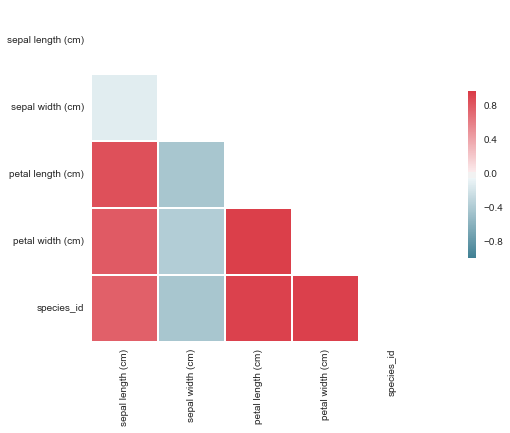

In [6]:
d_corr=data.iloc[:,[0,1,2,3,5]].corr()
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
mask = np.zeros_like(d_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d_corr,mask=mask, cmap=cmap, vmax=0.99,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [7]:
d_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
species_id,0.782561,-0.419446,0.949043,0.956464,1.000000


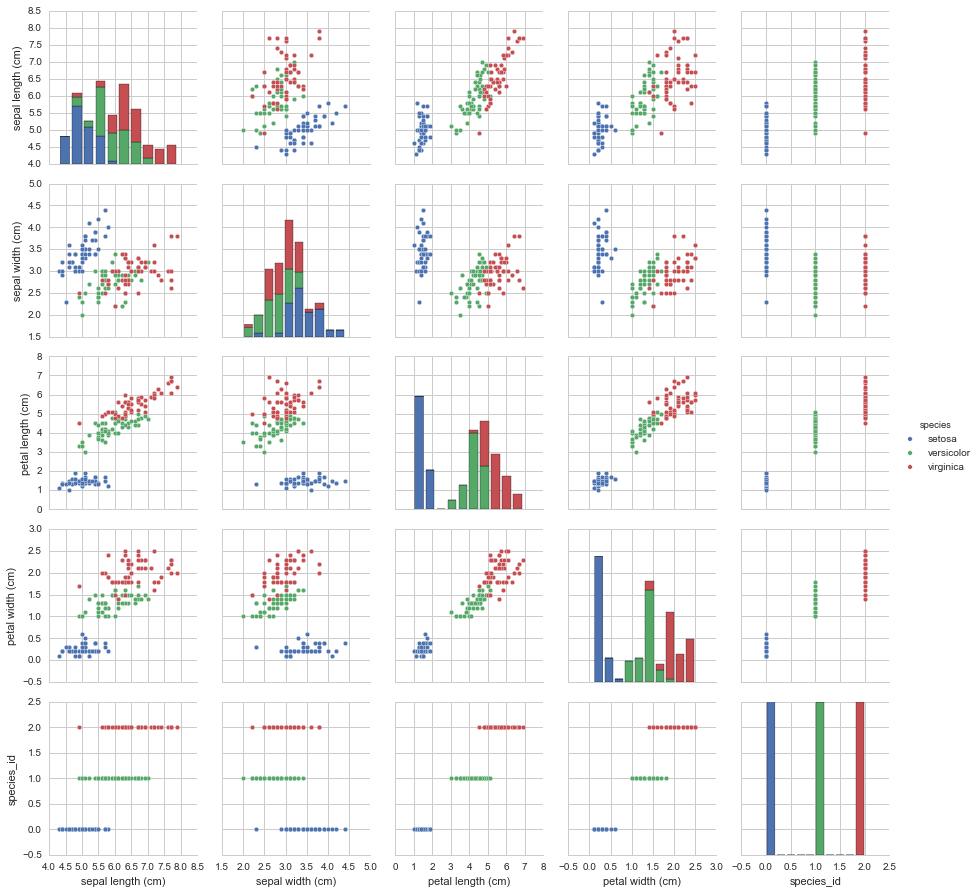

In [8]:
sns.set_style('whitegrid')
sns.pairplot(data, hue='species')
plt.show()

In [9]:
def cluster_1_label(alpha):
    if alpha == 0:
        return 'virginica'
    if alpha == 1:
        return 'setosa'
    if alpha == 2:
        return 'versicolor'

def cluster_2_label(beta):
    if beta == 1 or beta == 7 or beta == 8:
        return 'setosa'
    if beta == 0 or beta == 3 or beta == 6:
        return 'versicolor'
    if beta == 2 or beta == 4 or beta == 5:
        return 'virginica'

In [10]:
# KMeans Cluster to explore data - 3 Clusters
kmeans_model_1 = KMeans(n_clusters=3,random_state=123)
distances_1 = kmeans_model_1.fit_transform(data.iloc[:,0:4])
labels_1 = kmeans_model_1.labels_
data['cluster_1']=labels_1
data['cluster_1_label']=data['cluster_1'].apply(cluster_1_label)
pd.crosstab(data['species'],labels_1)

col_0,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,36,0,14


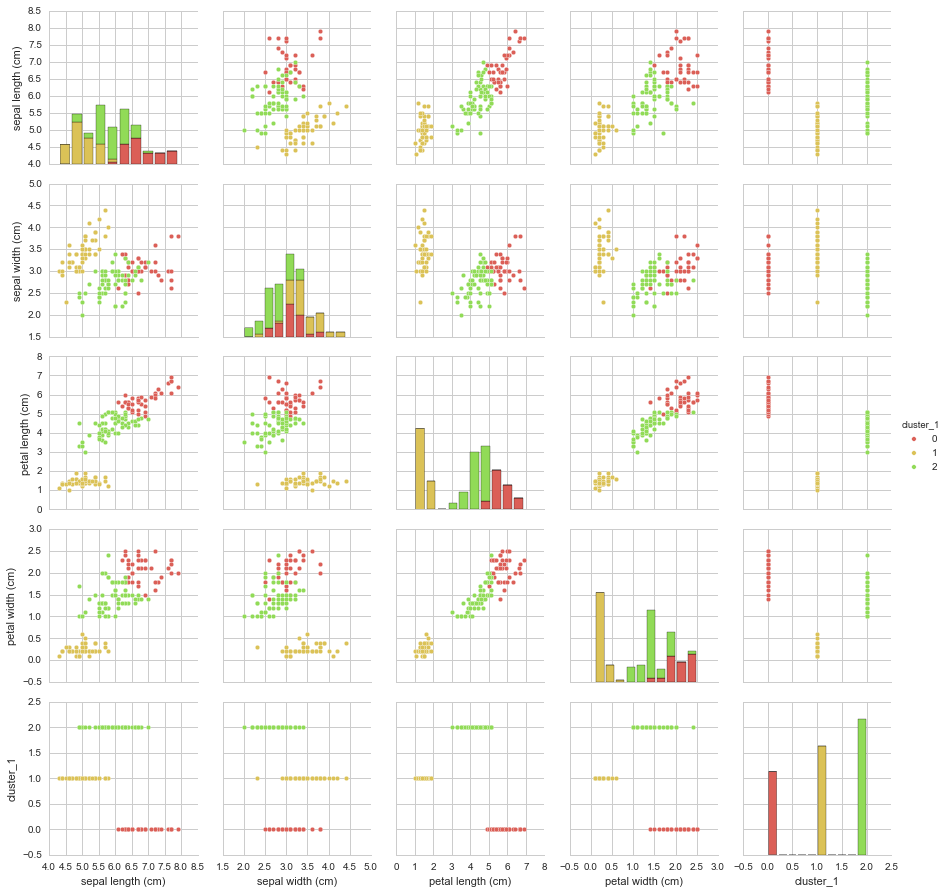

In [11]:
with sns.color_palette("hls", 8):
    sns.pairplot(data.iloc[:,[0,1,2,3,-2]], hue='cluster_1')

In [12]:
# KMeans Cluster to explore data - 9 Clusters
kmeans_model_2 = KMeans(n_clusters=9,random_state=123)
distances_2 = kmeans_model_2.fit_transform(data.iloc[:,0:4])
labels_2 = kmeans_model_2.labels_
data['cluster_2']=labels_2
data['cluster_2_label']=data['cluster_2'].apply(cluster_2_label)
data = data.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
pd.crosstab(data['species'],data['cluster_2'])

cluster_2,0,1,2,3,4,5,6,7,8
species,,,,,,,,,
setosa,0,22,0,0,0,0,0,20,8
versicolor,19,0,0,23,0,4,4,0,0
virginica,0,0,12,1,22,15,0,0,0


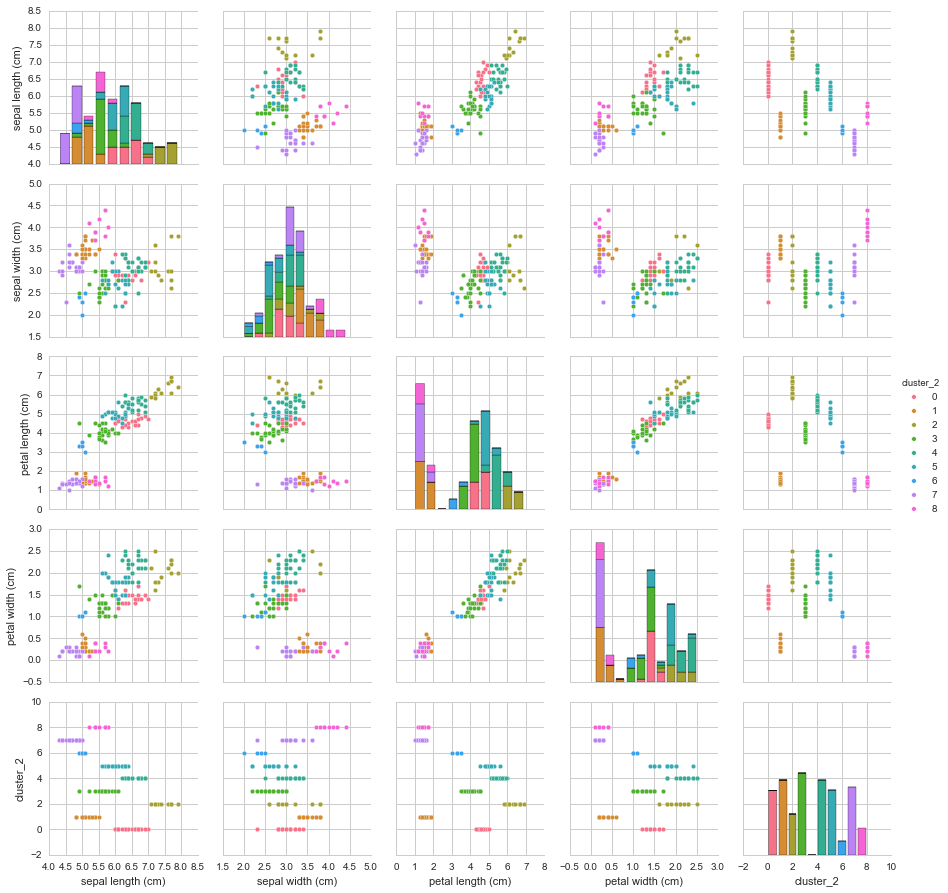

In [13]:
sns.pairplot(data.iloc[:,[0,1,2,3,8]], hue='cluster_2')

In [14]:
cluster_1_accuracy = len(data[data['species']==data['cluster_1_label']])/len(data)
cluster_2_accuracy = len(data[data['species']==data['cluster_2_label']])/len(data)
print('K=3 KMeans -> {0:.4f}%'.format(cluster_1_accuracy*100))
print('K=9 KMeans -> {0:.4f}%'.format(cluster_2_accuracy*100))

K=3 KMeans -> 89.3333%
K=9 KMeans -> 96.6667%


In [15]:
dummies = pd.get_dummies(data['species'],prefix='actual')
data = pd.concat([data,dummies],axis=1)

In [16]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_id,cluster_1,cluster_1_label,cluster_2,cluster_2_label,actual_setosa,actual_versicolor,actual_virginica
0,5.1,3.5,1.4,0.2,setosa,0,1,setosa,1,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,0,1,setosa,7,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,0,1,setosa,7,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,0,1,setosa,7,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,0,1,setosa,1,setosa,1.0,0.0,0.0


In [17]:
classifiers = ['versicolor','virginica','setosa']
models = {}
for mdl_idx in classifiers:
    lgr_model = LogisticRegression()
    lgr_model.fit(data.iloc[:,[0,1,2,3]],data['actual_{}'.format(mdl_idx)])
    models[mdl_idx]=lgr_model
models

{'setosa': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'versicolor': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'virginica': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False)}

In [18]:
coefs = {}
for mdl_k, mdl_v in models.items():
    coefs[mdl_k]=mdl_v.coef_
coefs

{'setosa': array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ]]),
 'versicolor': array([[ 0.41663969, -1.60083319,  0.57765763, -1.38553843]]),
 'virginica': array([[-1.70752515, -1.53426834,  2.47097168,  2.55538211]])}

In [19]:
lgr_probabilities = pd.DataFrame(columns=classifiers)
for mdl_key, mdl_model in models.items():
    lgr_probabilities[mdl_key] = mdl_model.predict_proba(data.iloc[:,[0,1,2,3]])[:,1]
lgr_probabilities.head()

,versicolor,virginica,setosa
0,0.134585,0.000012,0.984074
1,0.241600,0.000037,0.964775
2,0.167258,0.000030,0.976924
3,0.202420,0.000067,0.957121
4,0.112769,0.000012,0.985634


In [20]:
predicted_species = lgr_probabilities.idxmax(axis=1)
pred_spec = lgr_probabilities.max(axis=1)
lgr_accuracy = len(data[data['species']==predicted_species])/len(data)
pd.crosstab(data['species'],predicted_species)

col_0,setosa,versicolor,virginica
species,,,
setosa,50,0,0
versicolor,0,45,5
virginica,0,1,49


### Accuracy

In [21]:
print('Logistic Regression Accuracy - {0:.4f}%'.format(lgr_accuracy*100));
print('3-Cluster K-Means Clustering Accuracy - {0:.4f}%'.format(cluster_1_accuracy*100));
print('9-Cluster K-Means Clustering Accuracy - {0:.4f}%'.format(cluster_2_accuracy*100));

Logistic Regression Accuracy - 96.0000%
3-Cluster K-Means Clustering Accuracy - 89.3333%
9-Cluster K-Means Clustering Accuracy - 96.6667%


### Receiver Operator Characteristic (ROC) Curve

In [22]:
log_setosa_fpr, log_setosa_tpr, log_setosa_thresholds = roc_curve(data['actual_setosa'],
                                                                  lgr_probabilities['setosa'])
log_versicolor_fpr, log_versicolor_tpr, log_versicolor_thresholds = roc_curve(data['actual_versicolor'],
                                                                              lgr_probabilities['versicolor'])
log_virginica_fpr, log_virginica_tpr, log_virginica_thresholds = roc_curve(data['actual_virginica'],
                                                                           lgr_probabilities['virginica'])

# print(log_setosa_fpr);
# print(log_setosa_tpr);
# print(log_setosa_thresholds)

# print(log_versicolor_fpr);
# print(log_versicolor_tpr);
# print(log_versicolor_thresholds)

# print(log_virginica_fpr);
# print(log_virginica_tpr);
# print(log_virginica_thresholds)

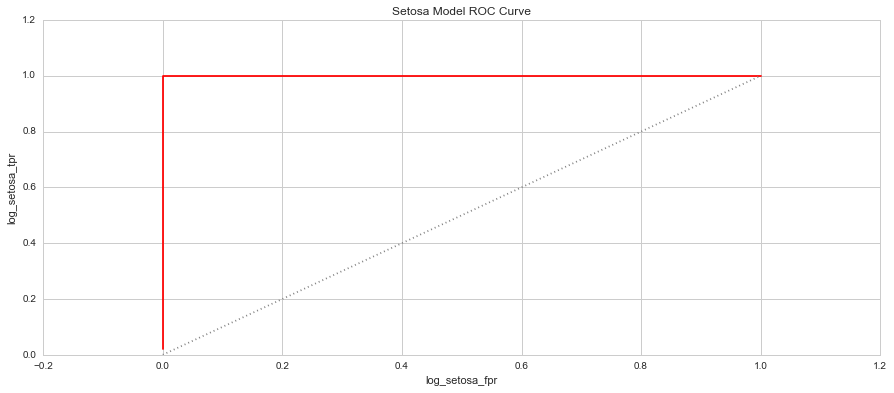

In [23]:
plt.figure(figsize=(15,6))
plt.xlim([-0.2, 1.2])
plt.ylim([0, 1.2])
plt.title('Setosa Model ROC Curve')
plt.xlabel('log_setosa_fpr')
plt.ylabel('log_setosa_tpr')
plt.plot(log_setosa_fpr, log_setosa_tpr,c='r')
plt.plot([0,1],[0,1], c='grey',ls=':')
plt.show()

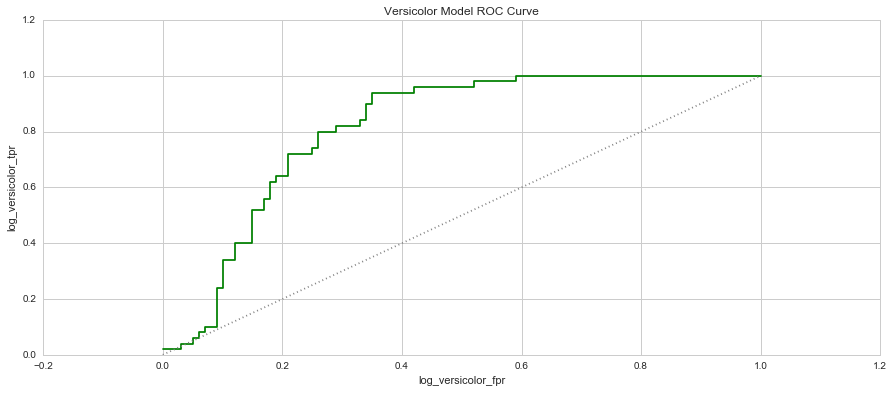

In [24]:
plt.figure(figsize=(15,6))
plt.xlim([-0.2, 1.2])
plt.ylim([0, 1.2])
plt.title('Versicolor Model ROC Curve')
plt.xlabel('log_versicolor_fpr')
plt.ylabel('log_versicolor_tpr')
plt.plot(log_versicolor_fpr, log_versicolor_tpr,c='g')
plt.plot([0,1],[0,1], c='grey',ls=':')
plt.show()

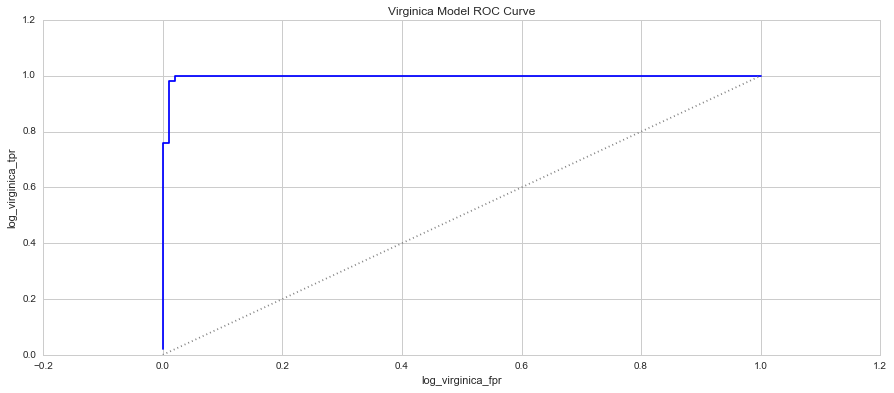

In [25]:
plt.figure(figsize=(15,6))
plt.xlim([-0.2, 1.2])
plt.ylim([0, 1.2])
plt.title('Virginica Model ROC Curve')
plt.xlabel('log_virginica_fpr')
plt.ylabel('log_virginica_tpr')
plt.plot(log_virginica_fpr, log_virginica_tpr,c='b')
plt.plot([0,1],[0,1], c='grey',ls=':')
plt.show()

In [26]:
log_setosa_auc = roc_auc_score(data['actual_setosa'],lgr_probabilities['setosa'])
log_versicolor_auc = roc_auc_score(data['actual_versicolor'],lgr_probabilities['versicolor'])
log_virginica_auc = roc_auc_score(data['actual_virginica'],lgr_probabilities['virginica'])

print('The AUC score for Sentosa Model - {0:.4f}%'.format(log_setosa_auc*100))
print('The AUC score for Versicolor Model - {0:.4f}%'.format(log_versicolor_auc*100))
print('The AUC score for Virginica Model - {0:.4f}%'.format(log_virginica_auc*100))

The AUC score for Sentosa Model - 100.0000%
The AUC score for Versicolor Model - 81.1800%
The AUC score for Virginica Model - 99.7400%


### Cross Validation

In [27]:
# k fold cross validation of results
kf = KFold(len(data), n_folds=10, shuffle=True, random_state=123)
classifiers = ['versicolor','virginica','setosa']
k_models = {}
k_probabilities = {}
k_accuracies = {}
k_pred_spec = {}
k_roc = {}
k_auc = {}
colors = ['m','y','k','#9500d8','#a6ff9b','#7f3a18','b','g','r','c']

for mdl_idx, (train_idx, test_idx) in enumerate(kf):
    train_data = data.iloc[train_idx]
    test_data = data.iloc[test_idx]
    models = {}
    
    for classer in classifiers:
        model = LogisticRegression()
        model.fit(train_data.iloc[:,[0,1,2,3]],train_data['actual_{}'.format(classer)])
        models[classer]=model
    k_models[mdl_idx]=models
    temp_probabilities = pd.DataFrame(columns=classifiers)
    
    for mdl_key, mdl_model in k_models[mdl_idx].items():
        temp_probabilities[mdl_key] = mdl_model.predict_proba(test_data.iloc[:,[0,1,2,3]])[:,1]
        k_probabilities[mdl_idx]=temp_probabilities
        
    for mdl_key, mdl_probs in k_probabilities[mdl_idx].items():
        predicted_species = temp_probabilities.idxmax(axis=1)
        pred_spec=temp_probabilities.max(axis=1)
        lgr_accuracy = len(test_data[test_data['species']==predicted_species])/len(test_data)
        k_accuracies[mdl_idx]=lgr_accuracy
        k_pred_spec[mdl_idx]=pred_spec
    
    roc={}
    for classer in classifiers:
        fpr, tpr, thresholds = roc_curve(test_data['actual_{}'.format(classer)],k_probabilities[mdl_idx][classer])
        roc[classer]=(fpr,tpr,thresholds)
    k_roc[mdl_idx]=roc
    
    auc={}
    for classer in classifiers:
        auc_score = roc_auc_score(test_data['actual_{}'.format(classer)],k_probabilities[mdl_idx][classer])
        auc[classer]=auc_score
    k_auc[mdl_idx]=auc


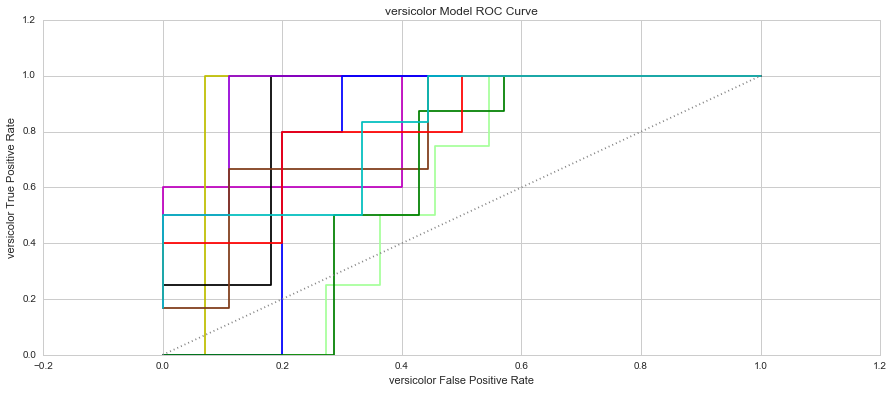

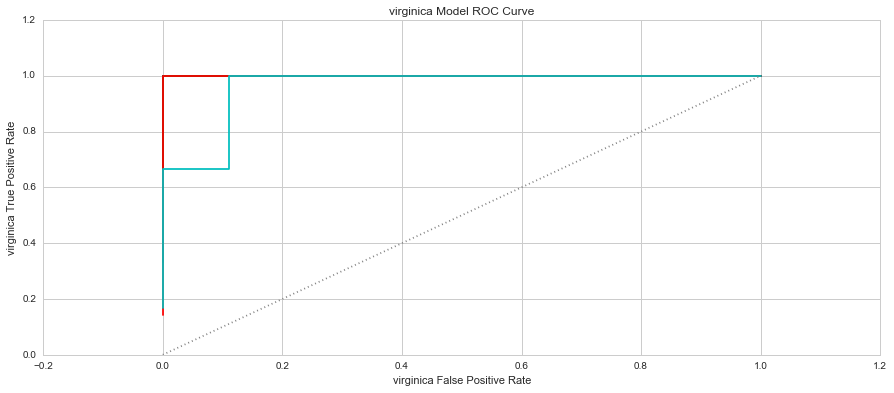

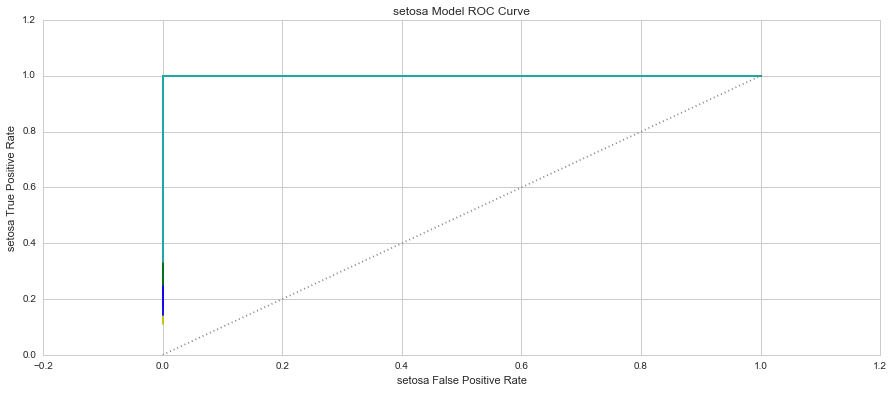

In [28]:
for classer in classifiers:
    plt.figure(figsize=(15,6))
    plt.xlim([-0.2, 1.2])
    plt.ylim([0, 1.2])
    plt.title('{} Model ROC Curve'.format(classer))
    plt.xlabel('{} False Positive Rate'.format(classer))
    plt.ylabel('{} True Positive Rate'.format(classer))
    for k, v in k_roc.items():
        fpr = v[classer][0]
        tpr = v[classer][1]
        plt.plot(fpr, tpr, c=colors[k])
    plt.plot([0,1],[0,1], c='grey',ls=':')
    plt.show()


In [29]:
k_auc

{0: {'setosa': 1.0, 'versicolor': 0.83999999999999997, 'virginica': 1.0},
 1: {'setosa': 1.0, 'versicolor': 0.9285714285714286, 'virginica': 1.0},
 2: {'setosa': 1.0, 'versicolor': 0.86363636363636354, 'virginica': 1.0},
 3: {'setosa': 1.0, 'versicolor': 0.94444444444444442, 'virginica': 1.0},
 4: {'setosa': 1.0, 'versicolor': 0.59090909090909094, 'virginica': 1.0},
 5: {'setosa': 1.0, 'versicolor': 0.79629629629629628, 'virginica': 1.0},
 6: {'setosa': 1.0, 'versicolor': 0.77999999999999992, 'virginica': 1.0},
 7: {'setosa': 1.0, 'versicolor': 0.625, 'virginica': 1.0},
 8: {'setosa': 1.0, 'versicolor': 0.82000000000000006, 'virginica': 1.0},
 9: {'setosa': 1.0,
  'versicolor': 0.81481481481481488,
  'virginica': 0.96296296296296291}}

In [30]:
setosa_auc = 0
versicolor_auc = 0
virginica_auc = 0

for k,v in k_auc.items():
    setosa_auc += v['setosa']
    versicolor_auc += v['versicolor']
    virginica_auc += v['virginica']

print('The Cross Validated AUC score for the Sentosa Model - {0:.4f}%'.format(setosa_auc*10))
print('The Cross Validated AUC score for the Versicolor Model - {0:.4f}%'.format(versicolor_auc*10))
print('The Cross Validated AUC score for the Virginica Model - {0:.4f}%'.format(virginica_auc*10))

The Cross Validated AUC score for the Sentosa Model - 100.0000%
The Cross Validated AUC score for the Versicolor Model - 80.0367%
The Cross Validated AUC score for the Virginica Model - 99.6296%


In [31]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_id,cluster_1,cluster_1_label,cluster_2,cluster_2_label,actual_setosa,actual_versicolor,actual_virginica
0,5.1,3.5,1.4,0.2,setosa,0,1,setosa,1,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,0,1,setosa,7,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,0,1,setosa,7,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,0,1,setosa,7,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,0,1,setosa,1,setosa,1.0,0.0,0.0


In [32]:
classifiers = ['versicolor','virginica','setosa']

l_model = LogisticRegression()
l_model.fit(data.iloc[:,[0,1,2,3]],data['actual_setosa'])
l_model.coef_

array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ]])